In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Read in ZHVI Home Data

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ZHVI = Zillow Home Value Index**

In [3]:
df = pd.read_csv("Zip_Zhvi_Summary_AllHomes.csv")
df.head(5)

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
0,2016-05-31,61639,10025,NY,New York,New York,New York,0,1065700,-0.019325,-0.014792,0.079081,0.074313,0.036853,2016-03,2016-Q1,1096800,-0.028355,2015-08
1,2016-05-31,84654,60657,IL,Chicago,Cook,Chicago,1,311400,-0.000321,0.005165,0.008746,0.028485,-0.002845,2007-09,2007-Q3,324300,-0.039778,2005-06
2,2016-05-31,61637,10023,NY,New York,New York,New York,2,1060600,-0.005905,-0.041309,0.029809,0.045511,0.024610,2015-09,2015-Q3,1129300,-0.060834,2015-07
3,2016-05-31,84616,60614,IL,Chicago,Cook,Chicago,3,381500,0.004476,0.013819,0.067133,0.027629,-0.000679,2007-09,2007-Q3,398100,-0.041698,2005-12
4,2016-05-31,93144,79936,TX,El Paso,El Paso,El Paso,4,111100,0.000901,0.008167,-0.004480,-0.005489,0.003020,2007-12,2007-Q4,131000,-0.151908,2006-07


## Drop Unused Columns and Rename ZIP

In [4]:
price = df[['RegionName','City','State','SizeRank','Zhvi','5Year','10Year','PeakZHVI']]
price.columns.values[0] = 'Zip'
price.head(5)

,Zip,City,State,SizeRank,Zhvi,5Year,10Year,PeakZHVI
0,10025,New York,NY,0,1065700,0.074313,0.036853,1096800
1,60657,Chicago,IL,1,311400,0.028485,-0.002845,324300
2,10023,New York,NY,2,1060600,0.045511,0.024610,1129300
3,60614,Chicago,IL,3,381500,0.027629,-0.000679,398100
4,79936,El Paso,TX,4,111100,-0.005489,0.003020,131000


## Drop Nulls/Zips with Low Population and Sort By ZHVI

In [5]:
price = price[pd.notnull(price['10Year'])]
price = price[price.SizeRank > 8000]
price.sort_values(by='Zhvi').head(5)

,Zip,City,State,SizeRank,Zhvi,5Year,10Year,PeakZHVI
12252,73550,Hollis,OK,12252,36400,0.047953,0.022635,42700
8266,46406,Gary,IN,8266,39000,-0.065764,-0.049946,70500
12854,73860,Waynoka,OK,12854,39300,-0.022340,0.016705,49200
9614,45416,Trotwood,OH,9614,40100,-0.022793,-0.045972,67300
10926,17970,Saint Clair,PA,10926,40800,0.012727,-0.008643,52700


In [6]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4685 entries, 8001 to 13359
Data columns (total 8 columns):
Zip         4685 non-null int64
City        4685 non-null object
State       4685 non-null object
SizeRank    4685 non-null int64
Zhvi        4685 non-null int64
5Year       4685 non-null float64
10Year      4685 non-null float64
PeakZHVI    4685 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 329.4+ KB


# Start Graphing

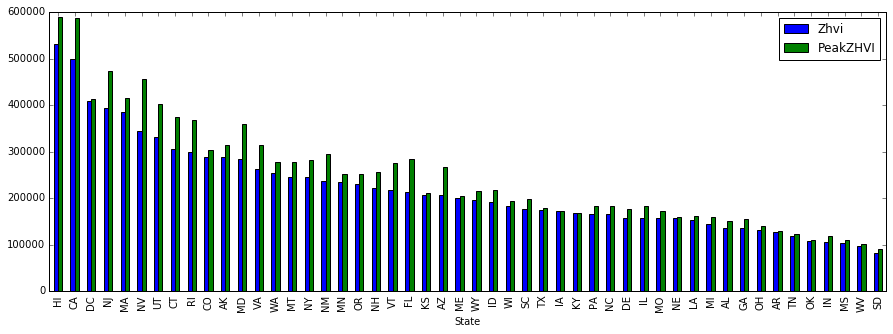

In [7]:
zhvistate = price.groupby('State')

zhvistate[('Zhvi','PeakZHVI')].mean().sort_values(by='Zhvi',ascending=False).plot.bar(figsize=(15,5))

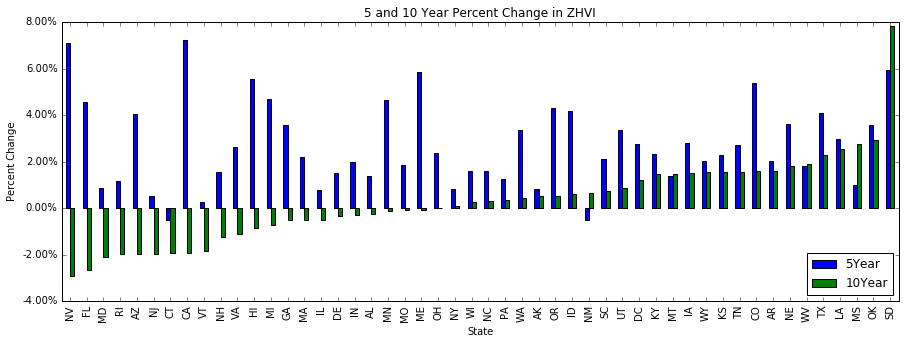

In [8]:
ax = zhvistate[('5Year','10Year')].mean().sort_values(by='10Year').plot.bar(figsize=(15,5),title='5 and 10 Year Percent Change in ZHVI')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax.set_ylabel('Percent Change')

# Import Rent Data

In [9]:
rent = pd.read_csv('Zip_PriceToRentRatio_AllHomes (1).csv')
rent.head(4)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-10,2010-11,2010-12,...,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05
0,61639,10025,New York,NY,New York,New York,1,18.74,18.92,19.07,...,26.56,26.58,25.85,25.25,23.29,23.22,23.42,23.74,23.53,22.91
1,84654,60657,Chicago,IL,Chicago,Cook,2,13.27,13.20,13.20,...,12.33,12.39,12.27,12.30,12.41,12.39,12.46,12.39,12.41,12.35
2,61637,10023,New York,NY,New York,New York,3,20.48,20.73,20.59,...,25.62,25.16,24.16,23.62,21.78,21.97,21.88,21.55,21.43,20.88
3,84616,60614,Chicago,IL,Chicago,Cook,4,14.09,14.04,13.85,...,13.35,13.48,13.35,13.36,13.19,13.20,13.32,13.31,13.40,13.36


In [10]:
pricetorent = rent[['RegionName','City','State','SizeRank','2016-05']]
pricetorent.head(5)

,RegionName,City,State,SizeRank,2016-05
0,10025,New York,NY,1,22.91
1,60657,Chicago,IL,2,12.35
2,10023,New York,NY,3,20.88
3,60614,Chicago,IL,4,13.36
4,79936,El Paso,TX,5,9.10


## Rename Columns

In [11]:
pricetorent = pricetorent.rename(columns={'2016-05':'PtoR','RegionName':'Zip'})
pricetorent.head(5)

,Zip,City,State,SizeRank,PtoR
0,10025,New York,NY,1,22.91
1,60657,Chicago,IL,2,12.35
2,10023,New York,NY,3,20.88
3,60614,Chicago,IL,4,13.36
4,79936,El Paso,TX,5,9.10


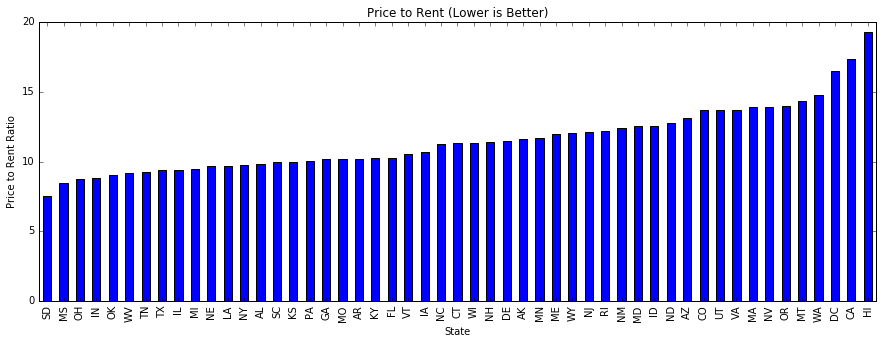

In [12]:
ptrstate = pricetorent.groupby('State')

ax = ptrstate['PtoR'].mean().sort_values().plot.bar(figsize=(15,5),title='Price to Rent (Lower is Better)')
ax.set_ylabel('Price to Rent Ratio')